# Customer Churn Prediction 

In [2]:
# 1) Import data manipulation libraries
import pandas as pd
import numpy as np

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import warnings
import warnings
warnings.filterwarnings('ignore')

# import logging
import logging
logging.basicConfig(level='logging.INFO',
                    filename='model.log',
                    filemode='w',
                    format='%(asctime)s - %(levelname)s - %(messages)s')

In [ ]:
# 2) load the dataset using pandas : Data ingestion
df = pd.read_csv("customer churn.csv")
df.sample(frac = 1)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5340,5032-USPKF,Female,0,No,No,38,Yes,Yes,DSL,Yes,...,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),84.10,3187.65,No
1769,3144-KMTWZ,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Bank transfer (automatic),93.25,6669.45,No
2186,5970-GHJAW,Male,0,Yes,Yes,46,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.95,862.4,No
608,8207-DMRVL,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Bank transfer (automatic),114.55,8306.05,No
5231,1075-BGWOH,Male,1,Yes,No,16,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.75,1587.55,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,8942-DBMHZ,Male,0,No,No,12,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,20.45,255.35,No
3374,7580-UGXNC,Female,1,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,54.85,104.2,Yes
106,6728-DKUCO,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,Yes,...,No,No,Yes,Yes,One year,Yes,Electronic check,104.15,7303.05,No
987,3717-OFRTN,Male,0,No,No,1,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Bank transfer (automatic),19.75,19.75,No


In [ ]:
# 3) Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


<Axes: >

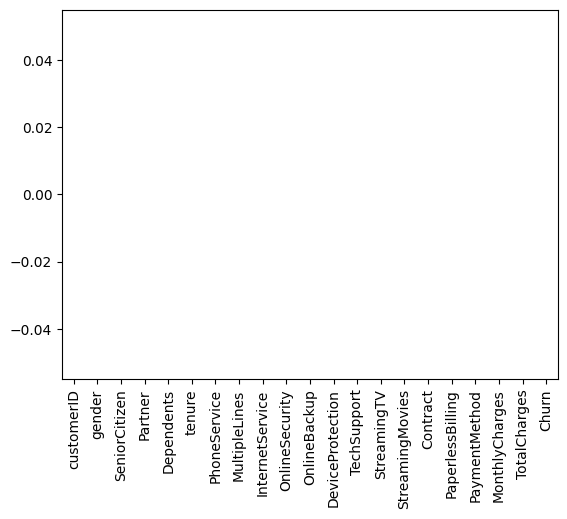

In [ ]:
# 4) Finding missing values of dataset
df.isnull().sum().plot(kind = 'bar')

In [ ]:
# 5) Segregate numerical and categorical column
numerical_col = df.select_dtypes(exclude = 'object')
categorical_col = df.select_dtypes(include = 'object')

In [ ]:
numerical_col.shape

(7043, 3)

In [ ]:
categorical_col.shape

(7043, 18)

In [ ]:
# 6) EDA
from collections import OrderedDict
stats = []
for i in numerical_col.columns:
    numerical_stats = OrderedDict({
        'Features':i,
        'Count': df[i].count(),
        'Minimum':df[i].min(),
        'Maximum':df[i].max(),
        'Mean':df[i].mean(),
        'Median':df[i].median(),
        'Q1':df[i].quantile(0.25),
        'Q3':df[i].quantile(0.75),
        'IQR':df[i].quantile(0.75) - df[i].quantile(0.25),
        'Std Devetion':df[i].std(),
        'Skewness':df[i].skew(),
        'Kurtosis':df[i].kurt(),
        
    })
    stats.append(numerical_stats)
    report = pd.DataFrame(stats)
report

,Features,Count,Minimum,Maximum,Mean,Median,Q1,Q3,IQR,Std Devetion,Skewness,Kurtosis
0,SeniorCitizen,7043,0.00,1.00,0.162147,0.00,0.0,0.00,0.00,0.368612,1.833633,1.362596
1,tenure,7043,0.00,72.00,32.371149,29.00,9.0,55.00,46.00,24.559481,0.239540,-1.387372
2,MonthlyCharges,7043,18.25,118.75,64.761692,70.35,35.5,89.85,54.35,30.090047,-0.220524,-1.257260


In [ ]:
# drop the column having IQR 0
df.drop(columns=['SeniorCitizen'],inplace=True)

In [ ]:
df.shape

(7043, 20)

In [ ]:
# 7) Label Encoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in categorical_col.columns:
    df[i] = le.fit_transform(df[i])

In [ ]:
# 8) Split dataset to X and y
X = df.drop(columns=['Churn'])
y = df['Churn']

In [ ]:
# 9) Split dataset to train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 0)

In [ ]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [ ]:
# 10) Balance the imbalance data
from imblearn.over_sampling import SMOTE
sm = SMOTE()
X_train,y_train = sm.fit_resample(X_train,y_train)

In [ ]:
pd.Series(y_train).value_counts()

Churn
1    3614
0    3614
Name: count, dtype: int64

# Scaling Technique

In [ ]:
# 11) Scaling Technique
from sklearn.preprocessing import RobustScaler
RS = RobustScaler()
X_train = RS.fit_transform(X_train)
X_test = RS.transform(X_test)

In [ ]:
df['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

# Model Building
# Tree based algorithm

In [ ]:
# 12) Model Building
# Tree based algorithm
from  sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

RF = RandomForestClassifier().fit(X_train,y_train)
y_pred = RF.predict(X_test)
accuracy_score(y_test,y_pred)

0.7808802650260294

# Navie Bayes

In [ ]:
# Naive Bayes
# Brunoli Naive Bayes
from sklearn.naive_bayes import BernoulliNB
BNB = BernoulliNB().fit(X_train,y_train)
y_pred_BNB = BNB.predict(X_test)
accuracy_score(y_test,y_pred_BNB)

0.7373402744912447

# KNN

In [ ]:
# KNN 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=2).fit(X_train,y_train)
y_pred_KNN = KNN.predict(X_test)
accuracy_score(y_test,y_pred_KNN)


0.7453857075248462

# SVM

In [ ]:
# SVM
from sklearn.svm import SVC
svc = SVC(degree= 3).fit(X_train,y_train)
y_pred_svm = svc.predict(X_test)
accuracy_score(y_test,y_pred_svm)

0.7813535257927118

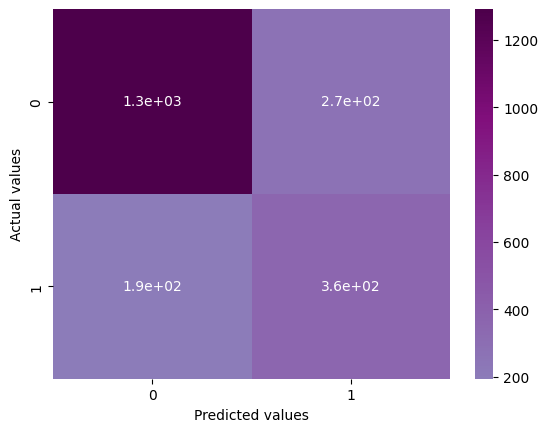

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix

sns.heatmap(confusion_matrix(y_test,y_pred_svm),annot = True,
            cmap = 'BuPu',center = 0)
plt.xlabel('Predicted values')
plt.ylabel('Actual values')
plt.show()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_svm))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1560
           1       0.57      0.65      0.61       553

    accuracy                           0.78      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.78      0.79      2113

